In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go

In [59]:
data= pd.read_csv('online_shoppers_intention.csv')

In [60]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [61]:
data.shape

(12330, 18)

In [62]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [63]:
missing =data.isnull().sum()
missing

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [64]:
data.fillna(0,inplace=True)

In [65]:
#Now have a look at product related bounce rates of customers:
x=data.iloc[:,[5,6]].values

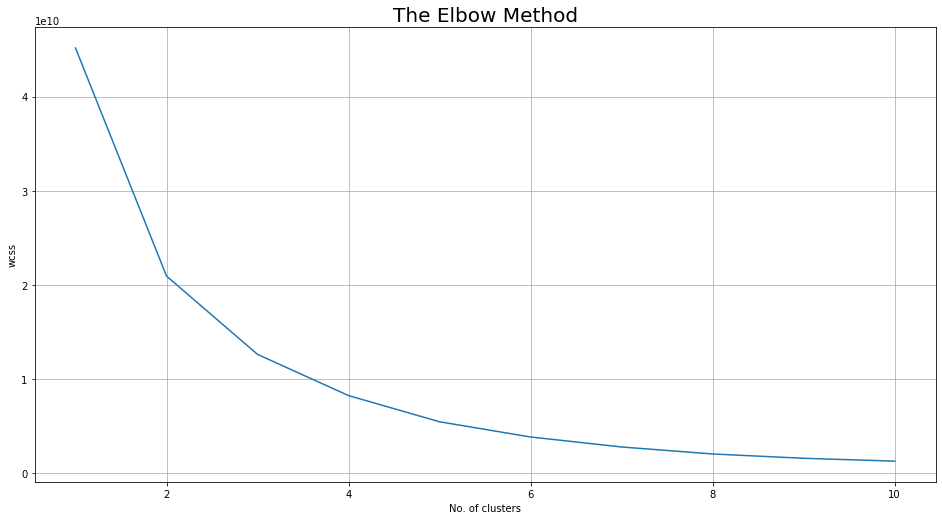

In [66]:
#Applying K-elbow method to determine the number of clustering groups

from sklearn.cluster import KMeans

wcss=[]  # with in cluster sum of squares
for i in range(1,11):
    km=KMeans(n_clusters= i, init ='k-means++',max_iter=300,n_init=10,random_state=0,algorithm='full',tol=0.001)
    km.fit(x)
    labels=km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize']=(13,7)
plt.plot(range(1,11),wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

# K Means Clustering
According to the graph above, the maximum curvature is at the second index, that is, the number of optimal clustering groups for the duration of the product and the bounce rates is 2. Once the number of clusterings determined, we apply the K Means method and plot the clusters:

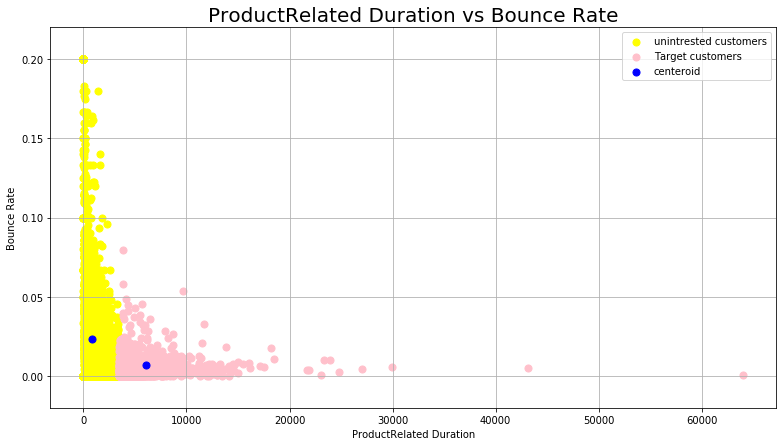

In [67]:
km=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)

#get predicted customer index for  each sample:0,1,2
y_means=km.fit_predict(x)

plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='yellow',label='unintrested customers')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='pink',label='Target customers')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='blue',label='centeroid')

plt.title('ProductRelated Duration vs Bounce Rate',fontsize=20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rate')
plt.legend()
plt.show()

#Looking at this K Means grouping plot, we can say with certainty that customers who spent more time on a product-related website are very less likely to leave the website after viewing a single page.

Since K-Means is not a supervised learning method, we are adopting other ways of evaluating its clustering result. The leftmost column of the confusion matrix represents the actual label (True or False revenue), and the top row represents the expected clustering groups (uninterested customers or target customers):

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true=le.fit_transform(data['Revenue'])

#get predicted clustering result label
labels_pred =y_means

# print adjusted rand index, which measures the similarity of the two assignments
from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true,labels_pred)
print('Adjusted rand index:')
print(score)

Adjusted rand index:
0.08359442469281109


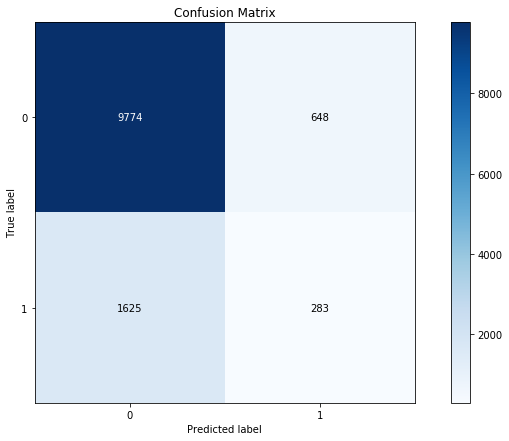

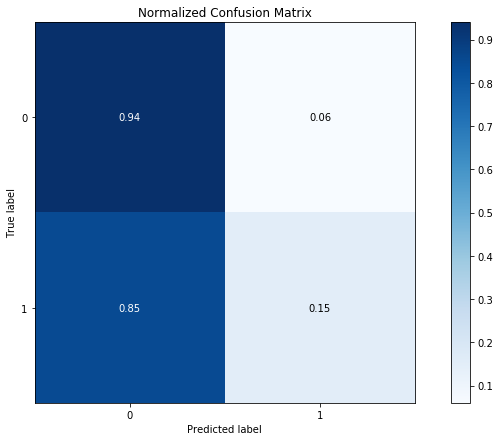

In [69]:
import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

# Observations from above plots:
From the confusion matrix, we can see that out of 10,422 failed incomes, 9,769 are grouped into uninterested customers or 94%. However, out of 937 successful incomes, only 284 are grouped as target customers or 15%. Also, the adjusted index score is not very high